In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import gc
import warnings

warnings.filterwarnings('ignore')
warnings.simplefilter(action='ignore', category=FutureWarning)
pd.set_option('max_columns', None)
pd.set_option('max_rows', None)

In [2]:
df = pd.read_hdf('../act_4.h5')
df.head(10)

,item_id,course_id,video_id,watching_count,video_duration,local_watching_time,video_progress_time,video_start_time,video_end_time,local_start_time,local_end_time,drop
0,U_7140103,TsinghuaX+20430064X+sp,V_05f095f52ac6446ba05b883171c66713,1,563.0,563,563.000000,0.0,563.00,2017-07-24 13:26:56,2017-07-24 13:36:19,0
1,U_7140103,TsinghuaX+34000888X+sp,V_0d166f12024942fca500891c0346b86a,1,166.0,166,166.000000,0.0,166.00,2017-07-06 14:47:00,2017-07-06 14:49:46,0
2,U_7140103,TsinghuaX+00691153X+sp,V_0d2ed7b0f77647388d3ad5420d1d6549,2,415.0,415,414.809998,0.0,415.00,2017-07-13 09:01:58,2017-07-13 13:18:15,0
3,U_7140103,TsinghuaX+20430064X+sp,V_10355a6a239c4a1dbc28e99bfb7633c1,1,173.0,174,173.000000,0.0,173.00,2017-07-24 13:11:47,2017-07-24 13:14:41,0
4,U_7140103,TsinghuaX+34000888X+sp,V_11f15f23fca948808b5f44e25b75f6a2,1,63.0,19,18.820000,0.0,18.82,2017-07-06 14:56:18,2017-07-06 14:56:37,0
5,U_7140103,TsinghuaX+34000888X+sp,V_1dfe758f74c64404aa98b30048d3bc77,3,262.0,262,261.830002,0.0,262.00,2017-07-06 14:35:15,2017-07-06 14:39:39,0
6,U_7140103,TsinghuaX+400182X+sp,V_1f6a60f535af482e99550cf8c74e78ca,2,1088.0,2097,2081.559998,0.0,1088.00,2017-07-15 14:33:10,2017-07-15 15:12:39,0
7,U_7140103,TsinghuaX+20430064X+sp,V_202664057afb470998c92d870d0b8fb3,1,254.0,254,254.000000,0.0,254.00,2017-07-24 13:07:28,2017-07-24 13:11:42,0
8,U_7140103,TsinghuaX+400182X+sp,V_21528e8bc6ee48d0ab996657ad4bb1ab,1,441.0,442,441.000000,0.0,441.00,2017-07-15 09:21:42,2017-07-15 09:29:04,0
9,U_7140103,TsinghuaX+20430064X+sp,V_2b0abbba1fdb442cb483dd9129891827,1,326.0,327,326.000000,0.0,326.00,2017-07-24 13:15:00,2017-07-24 13:20:27,0


In [3]:
df.shape

(730734, 12)

In [4]:
# df.drop_duplicates(['item_id', 'course_id', 'video_id'], inplace=True)
# df.shape

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730734 entries, 0 to 132
Data columns (total 12 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   item_id              730734 non-null  object 
 1   course_id            730734 non-null  object 
 2   video_id             730734 non-null  object 
 3   watching_count       730734 non-null  int64  
 4   video_duration       730734 non-null  float64
 5   local_watching_time  730734 non-null  int64  
 6   video_progress_time  730734 non-null  float64
 7   video_start_time     730734 non-null  float64
 8   video_end_time       730734 non-null  float64
 9   local_start_time     730734 non-null  object 
 10  local_end_time       730734 non-null  object 
 11  drop                 730734 non-null  int64  
dtypes: float64(4), int64(3), object(5)
memory usage: 72.5+ MB


In [6]:
df['local_start_time'] = pd.to_datetime(df['local_start_time'])
df['local_end_time'] = pd.to_datetime(df['local_end_time'])
gc.collect()

0

In [7]:
df['local_duration'] = df.apply(lambda x: (x['local_end_time'] - x['local_start_time']).seconds, axis=1)
del df['local_end_time'], df['local_start_time']
gc.collect()

0

In [8]:
df['video_watching_duration'] = df['video_end_time'] - df['video_start_time']
del df['video_end_time'], df['video_start_time']
gc.collect()

33

In [9]:
uid1 = ['item_id', 'course_id', 'video_id']
uid2 = ['item_id', 'course_id']
sum_cols = ['watching_count', 'video_duration', 'local_watching_time',
            'video_progress_time',  'local_duration', 'video_watching_duration']

In [10]:
for i in sum_cols:
    if i == 'watching_count':
        data = df.groupby(uid1)['drop'].apply(list)
        data = data.reset_index()
        gc.collect()
        
        tmp = df.groupby(uid1, as_index=False)[i].sum()
        data = data.merge(tmp, on=uid1, how='left')
        del tmp
        gc.collect()
    else:
        tmp = df.groupby(uid1, as_index=False)[i].sum()
        data = data.merge(tmp, on=uid1, how='left')
        del tmp
        gc.collect()

In [11]:
data['drop'] = data['drop'].map(lambda x: 1 if 1 in x else 0)

In [12]:
data['drop'].unique()

array([0, 1], dtype=int64)

In [13]:
data.head()

,item_id,course_id,video_id,drop,watching_count,video_duration,local_watching_time,video_progress_time,local_duration,video_watching_duration
0,U_1000763,HUBU+2017022703X+sp,V_1868fcc69aae4c84873693ab9625e970,0,3,491.0,510,506.982999,22690,491.0
1,U_1000763,HUBU+2017022703X+sp,V_2a08be8f69064c7ebb7951d07959ff12,0,34,251.0,527,493.441940,77050,251.0
2,U_1000763,HUBU+2017022703X+sp,V_31b0a46fe4b74381b55123228091b138,0,3,282.0,72,72.160000,77070,60.0
3,U_1000763,HUBU+2017022703X+sp,V_3f4d13f054974818948f6783c1a5bbfd,0,1,394.0,396,394.000000,396,394.0
4,U_1000763,HUBU+2017022703X+sp,V_7c71f2f189274698a773329684114ae5,0,54,395.0,1141,1138.059989,81800,395.0


In [14]:
data.shape

(727712, 10)

In [15]:
data['video_duration-local_watching_time'] = data['video_duration'] - data['local_watching_time']
data['video_duration-video_progress_time'] = data['video_duration'] - data['video_progress_time']
data['video_duration/video_progress_time'] = data['video_duration'] / (data['video_progress_time'] + 0.0001)
data['video_duration-local_duration'] = data['video_duration'] - data['local_duration']
data['video_duration-video_watching_duration'] = data['video_duration'] - data['video_watching_duration']

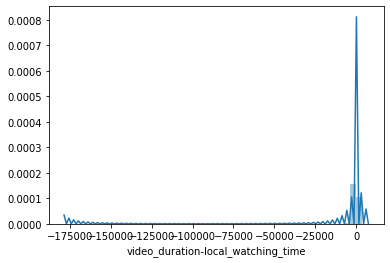

In [16]:
sns.distplot(data['video_duration-local_watching_time'])

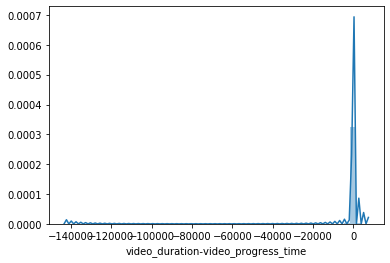

In [17]:
sns.distplot(data['video_duration-video_progress_time'])

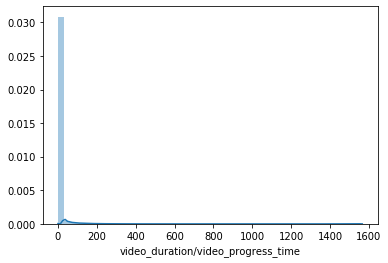

In [18]:
sns.distplot(data['video_duration/video_progress_time'])

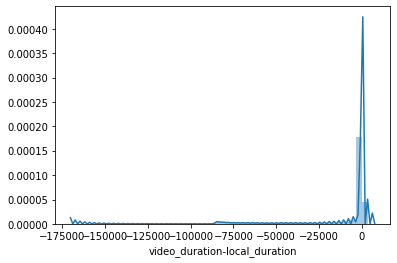

In [19]:
sns.distplot(data['video_duration-local_duration'])

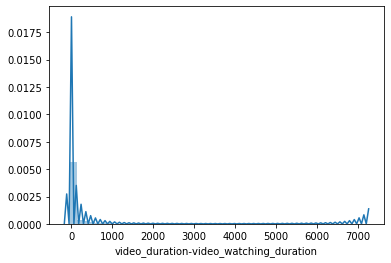

In [20]:
sns.distplot(data['video_duration-video_watching_duration'])